In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# load the data 
df = pd.read_csv(r"C:\Users\user\Downloads\FuelConsumptionCo2.csv")
print(df.describe())

       MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000 

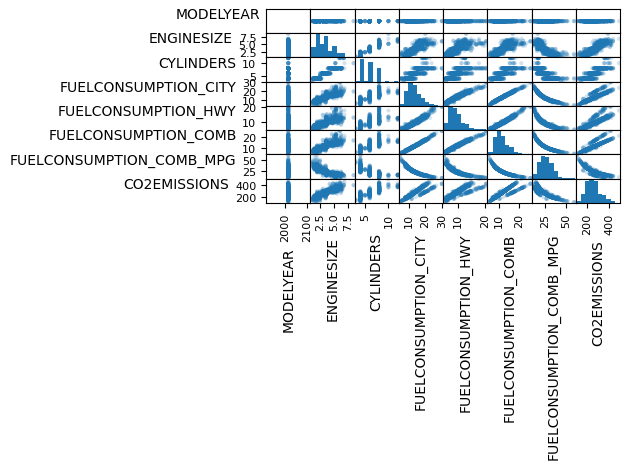

In [3]:
import pandas as pd

axes = pd.plotting.scatter_matrix(df, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()


In [4]:
features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']
target = 'CO2EMISSIONS'
train_x, test_x, train_y, test_y = train_test_split(df[features], df[target], test_size=0.2, random_state=4)



In [5]:
# Train model
model = LinearRegression()
model.fit(train_x, train_y)
predicted_y = model.predict(test_x)


In [6]:
# Print model coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [10.24537129  7.64355532  9.68132732]
Intercept: 65.25787570246086


In [7]:
# Evaluate model
r2 = r2_score(test_y, predicted_y)
print("R2 score:", r2)


R2 score: 0.890023090970219


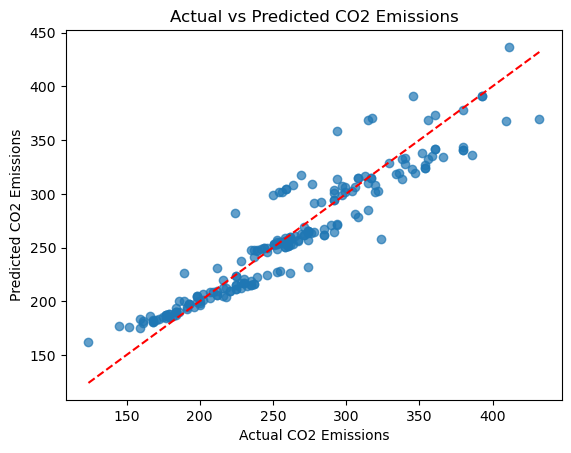

In [8]:
# Plot predicted vs actual
plt.scatter(test_y, predicted_y, alpha=0.7)
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.plot([test_y.min(), test_y.max()], [test_y.min(), test_y.max()], 'r--')
plt.show()
